# Логистическая регрессия в задаче классификации успеха маркетинговой кампании

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

## Логистическая регрессия

Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу. 

Метод основан на минимизации логистической функции потерь:

$$L(y_{true}, y_{predicted}) = \sum_{i=1}^n \ln (1 + e^{-y_{true} \cdot y_{predicted}}) \rightarrow \min_w,$$
где $y_{predicted}$ вычисляется по формуле $y_{predicted} = <w, x>$. Минимизация функции потерь происходит методом градиентного спуска.

In [3]:
from sklearn.linear_model import LogisticRegression

## Датасет

Возьмем датасет, содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача $-$ предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Ссылка на датасет: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [4]:
# Считаем данные
data = pd.read_csv('bank.csv', sep=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [8]:
y.mean()

0.11523999115239991

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является **one-hot encoding**. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$, и 0 $-$ иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [9]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   pdays                4521 non-null   int64
 6   previous             4521 non-null   int64
 7   job_admin.           4521 non-null   uint8
 8   job_blue-collar      4521 non-null   uint8
 9   job_entrepreneur     4521 non-null   uint8
 10  job_housemaid        4521 non-null   uint8
 11  job_management       4521 non-null   uint8
 12  job_retired          4521 non-null   uint8
 13  job_self-employed    4521 non-null   uint8
 14  job_services         4521 non-null   uint8
 15  job_student          4521 non-null   uint8
 16  job_technician       452

Разобьем выборку на трейн и тест:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM с балансировкой классов:

In [11]:
from sklearn.svm import SVC

In [12]:
model_svm = SVC(kernel='linear', class_weight='balanced')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Test accuracy:  0.7823204419889502
Test F measure:  0.4602739726027397


Обучим логистическую регрессию. Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании:

In [16]:
from sklearn import linear_model

In [17]:
model_logistic = linear_model.LogisticRegression()

In [18]:
# model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_predicted = model_logistic.predict_proba(X_test)[:, 1]

C:\Progs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Построим график зависимости F-меры от порога положительного класса:

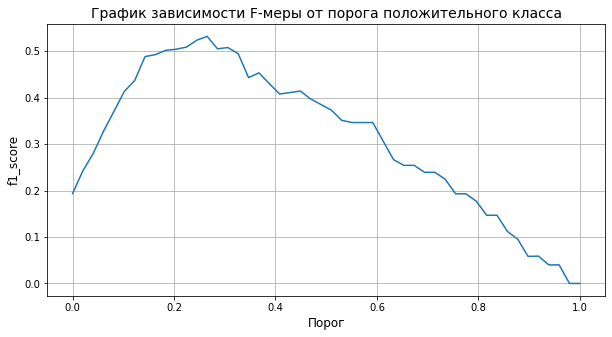

In [19]:
grid = np.linspace(0, 1, 50)
plt.figure(figsize=(10,5))
plt.title('График зависимости F-меры от порога положительного класса', fontsize=14)
plt.plot(grid, [f1_score(y_test, y_predicted > item) for item in grid])
plt.grid()
plt.xlabel('Порог', fontsize=12)
plt.ylabel('f1_score', fontsize=12);

In [20]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted > 0.2))
print('Test F measure: ', f1_score(y_test, y_predicted > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))

Test accuracy:  0.8662983425414365
Test F measure:  0.5020576131687242
Test ROC-AUC:  0.8607354292130245
